# Check whether Benford distribution could be used for Cartel detection

Probably not a thing, needs distribution over several orders of magnitude to work properly. 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

tqdm.pandas()

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = Path("../Daten/data_to_use")

In [9]:
df_brasil = pd.read_json(data_dir/"brazil_gaz_train.json")
df_japan = pd.read_json(data_dir/"japan_train.json")

**Look at distribution of some digits**

In [14]:
data_cartel = df_japan[df_japan.cartel == 1]
data_competition = df_japan[df_japan.cartel == 0]

In [92]:
def return_first_digit(number):
    return int(str(number)[0])

In [93]:
digits_cartel = data_cartel.bid.apply(return_digit)
digits_competition = data_competition.bid.apply(return_digit)

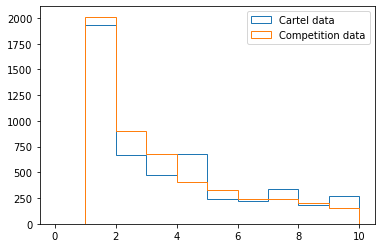

In [96]:
mybins = np.arange(0,11,1)
plt.title("Distribution of the first digit of th")
plt.hist(digits_cartel, histtype = "step", bins = mybins, label = "Cartel data")
plt.hist(digits_competition, histtype = "step", bins = mybins, label = "Competition data")
plt.legend()

--> doesn't work because relevant digit is different for each project

**Find out which is the most relevant digit - the invented digit**

Take the digit which has the highes variance as the relevant digit

In [42]:
df_japan

project       bid  cartel       date  nbids  rank        cv    spread  \
0            2  11169000       1 2003-04-17     10     1  0.102061  0.298236   
1            2  11427370       1 2003-04-17     10     2  0.102061  0.298236   
2            2  11456000       1 2003-04-17     10     3  0.102061  0.298236   
3            2  11487700       1 2003-04-17     10     4  0.102061  0.298236   
4            2  11492000       1 2003-04-17     10     5  0.102061  0.298236   
...        ...       ...     ...        ...    ...   ...       ...       ...   
13510     1454   3660000       0 2007-03-22     14    10  0.020483  0.084807   
13511     1454   3663000       0 2007-03-22     14    11  0.020483  0.084807   
13512     1454   3670000       0 2007-03-22     14    12  0.020483  0.084807   
13513     1454   3670000       0 2007-03-22     14    13  0.020483  0.084807   
13514     1454   3927000       0 2007-03-22     14    14  0.020483  0.084807   

          diffp        rd    rdnorm     rdalt      skew        ks  
0      0.023133  0.204791  0.698088  0.672701  0.811792  1.167042  
1      0.023133  0.204791  0.698088  0.672701  0.811792  1.167042  
2      0.023133  0.204791  0.698088  0.672701  0.811792  1.167042  
3      0.023133  0.204791  0.698088  0.672701  0.811792  1.167042  
4      0.023133  0.204791  0.698088  0.672701  0.811792  1.167042  
...         ...       ...       ...       ...       ...       ...  
13510  0.002762  0.130262  0.423453  0.404040  3.493668  2.475293  
13511  0.002762  0.130262  0.423453  0.404040  3.493668  2.475293  
13512  0.002762  0.130262  0.423453  0.404040  3.493668  2.475293  
13513  0.002762  0.130262  0.423453  0.404040  3.493668  2.475293  
13514  0.002762  0.130262  0.423453  0.404040  3.493668  2.475293  

[10185 rows x 14 columns]

In [72]:
test_project = df_japan.bid[df_japan.project ==2].apply(return_digit_array)

In [55]:
def return_digit_array(line):
    return np.array([int(i) for i in str(line)])

In [78]:
len(test_project[0])

8

In [79]:
test = np.concatenate(test_project.tolist()).reshape((10,8))

In [84]:
np.var(test, axis = 1)

array([ 9.9375  ,  6.359375,  5.359375, 10.25    ,  8.359375,  0.484375,
        2.75    ,  8.734375,  1.734375,  3.6875  ])

In [86]:
np.argmax(np.var(test, axis = 0))

4

In [87]:
def return_place_of_highest_variance_digit(arr):
    return np.argmax(np.var(np.concatenate(arr.tolist()).reshape((len(arr),len(arr[0]))), axis = 0))

In [90]:
df_japan[["project", "bid"]].groupby(by="project").return_place_of_highest_variance_digit()

AttributeError: 'DataFrameGroupBy' object has no attribute 'return_place_of_highest_variance_digit'

In [40]:
return_place_of_highest_variance_digit()
    

0        11169000
1        11427370
2        11456000
3        11487700
4        11492000
           ...   
13510     3660000
13511     3663000
13512     3670000
13513     3670000
13514     3927000
Name: bid, Length: 10185, dtype: int64